# Q.1 A cloth manufacturing company is interested to know about the segment or attributes causes high sale 

## Import required lib

In [147]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from pickle import dump
from pickle import load

## Import dataset

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Initial analysis

In [9]:
company_data.shape

(400, 11)

In [10]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [13]:
company_data[company_data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [14]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [16]:
company_data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [17]:
company_data['Urban'].uniquee()

array(['Yes', 'No'], dtype=object)

In [18]:
company_data['US'].uniqueue()

array(['Yes', 'No'], dtype=object)

## use one hot encoding for categorical data

In [20]:
company_data1 = pd.get_dummies(data = company_data,columns = ['ShelveLoc','Urban','US'])
company_data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


## Model building

In [21]:
x = company_data1.iloc[:,1:]
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [88]:
y = company_data1[['Sales']]

In [89]:
y

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [90]:
y.mean()

Sales    7.496325
dtype: float64

In [91]:
# if sales<7.49 then put small, else big

In [92]:
y['sales'] = 'small'
y.loc[y['Sales']>7.49,'sales']='large'
y.drop(labels = 'Sales',axis = 1,inplace = True)
y

,sales
0,large
1,large
2,large
3,small
4,small
...,...
395,large
396,small
397,small
398,small


In [93]:
le = LabelEncoder()
y['sales1'] = le.fit_transform(y['sales'])

In [94]:
y               # large = 0,small = 1

,sales,sales1
0,large,0
1,large,0
2,large,0
3,small,1
4,small,1
...,...,...
395,large,0
396,small,1
397,small,1
398,small,1


In [95]:
y.drop(labels = 'sales',axis = 1,inplace = True)
y.head()

,sales1
0,0
1,0
2,0
3,1
4,1


In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [104]:
x_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
199,122,88,5,335,126,64,14,0,0,1,0,1,0,1
43,123,42,11,16,134,59,13,0,0,1,0,1,0,1
307,138,92,0,13,120,61,12,1,0,0,0,1,1,0
166,119,67,17,151,137,55,11,0,0,1,0,1,0,1
64,100,67,12,184,104,32,16,0,0,1,1,0,0,1


In [107]:
y_train.head()

,sales1
199,1
43,1
307,1
166,1
64,0


In [108]:
x_test.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
280,121,86,10,496,145,51,10,1,0,0,0,1,0,1
387,142,73,14,238,115,73,14,0,0,1,1,0,0,1
313,103,81,3,491,54,66,13,0,0,1,0,1,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
35,131,84,11,29,96,44,17,0,0,1,1,0,0,1


In [109]:
y_test.head()

,sales1
280,1
387,0
313,0
1,0
35,0


In [110]:
x_train.shape,y_train.shape   # training data

((320, 14), (320, 1))

In [111]:
x_test.shape,y_test.shape

((80, 14), (80, 1))

## Create decision tree algo

In [115]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

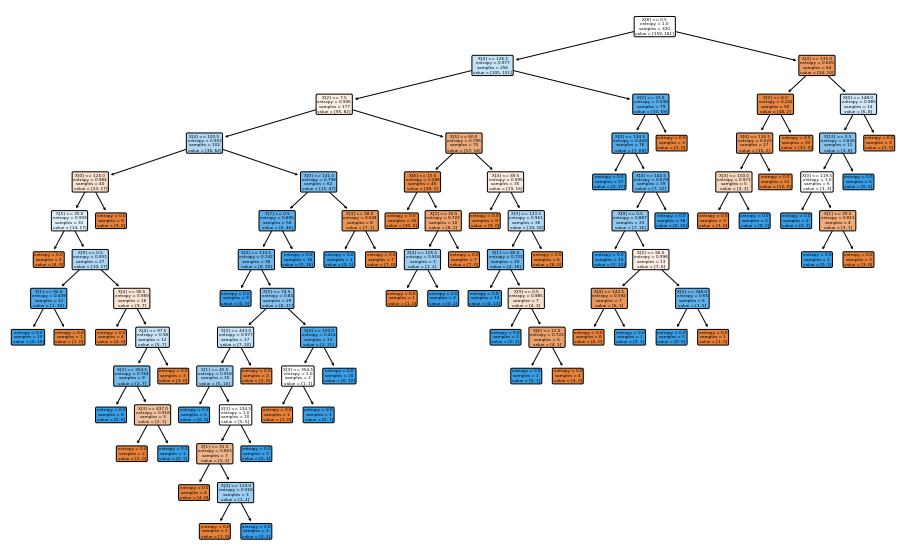

In [118]:
plt.figure(figsize = (16,10))
plot_tree(dt_model,rounded = True,filled = True)
plt.show()

## Model testing

In [121]:
y_train_pred = dt_model.predict(x_train)  # training data

In [122]:
accuracy_score(y_train,y_train_pred)

1.0

In [123]:
confusion_matrix(y_train,y_train_pred)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [125]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       161

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [127]:
y_test_pred = dt_model.predict(x_test)  # testing data

In [128]:
accuracy_score(y_test,y_test_pred)

0.7875

In [129]:
confusion_matrix(y_test,y_test_pred)

array([[34,  6],
       [11, 29]], dtype=int64)

In [130]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        40
           1       0.83      0.72      0.77        40

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [138]:
f1 = pd.DataFrame({'features':x.columns,
                   'important':dt_model.feature_importances_,}).sort_values('important',ascending = False)

In [139]:
f1

,features,important
4,Price,0.297393
0,CompPrice,0.167653
2,Advertising,0.115004
8,ShelveLoc_Good,0.093656
5,Age,0.082614
3,Population,0.074772
1,Income,0.070886
9,ShelveLoc_Medium,0.049236
6,Education,0.024520
7,ShelveLoc_Bad,0.013955


## Create second model

In [148]:
grid_serach = GridSearchCV(dt_model,param_grid={'criterion':['gini','entropy'],"max_depth":[3,4,5,6,7,8,9,10]},cv = 5)

In [149]:
grid_serach.fit(x,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]})

In [150]:
grid_serach.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [151]:
grid_serach.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [152]:
grid_serach.best_score_

0.7300000000000001

In [154]:
dt_model2 = DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt_model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

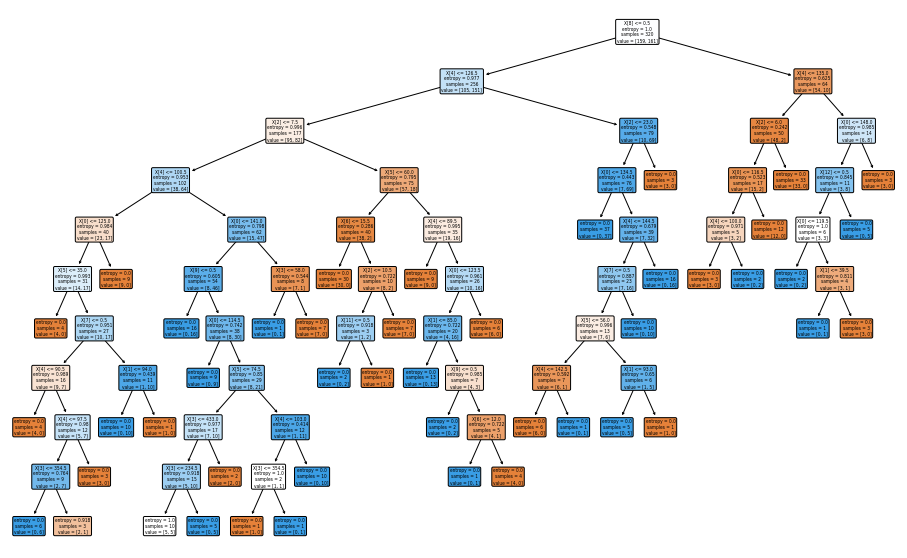

In [156]:
plt.figure(figsize = (16,10))
plot_tree(dt_model2,rounded = True,filled = True)
plt.show()

In [157]:
y_train_predict2 = dt_model2.predict(x_train)  # training data

In [158]:
accuracy_score(y_train,y_train_predict2)

0.98125

In [159]:
confusion_matrix(y_train,y_train_predict2)

array([[159,   0],
       [  6, 155]], dtype=int64)

In [160]:
print(classification_report(y_train,y_train_predict2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       161

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



In [161]:
# testing data
y_test_pred2 = dt_model2.predict(x_test)

In [162]:
accuracy_score(y_test,y_test_pred2)

0.7875

In [163]:
confusion_matrix(y_test,y_test_pred2)

array([[35,  5],
       [12, 28]], dtype=int64)

In [164]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        40
           1       0.85      0.70      0.77        40

    accuracy                           0.79        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.80      0.79      0.79        80



## model deployment

In [165]:
dump(dt_model2,file = open('dt_model2','wb'))

In [166]:
dt_model_diploy = load(open('dt_model2','rb'))
dt_model_diploy

DecisionTreeClassifier(criterion='entropy', max_depth=10)